In [ ]:
%run "./Ouverture_donnees.ipynb"

In [2]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import datetime

Cette partie porte sur la conduite des statistiques descriptives. L'objectif est de décrire les différentes variables de nos bases de données afin de déterminer les facteurs pouvant influencer la gravité de l'accident. Nous avons divisé les facteurs pouvent influencer la gravité de l'accident en 5 catégories:
* Météo
* Usagers
* Style de conduite
* Route
* Caractéristiques propres à l'accident  

Nous allons étudier chacune de ces catégories.  
Mais au préalable, afin de mener à bien ces statistiques descriptives, nous avons défini les fonctions qui nous permettront de représenter graphiquement les résultats obtenus. 

## Outils statistiques et graphiques

Ci-dessous les fonctions pour tracer différents types de diagrammes à barres servant à représenter la variable gravité en fonction des autres variables.

#### Diagrammes à barres

In [3]:
#Diagramme à barres
def diag_barres_gravite(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.gravite).reset_index().melt(id_vars=[variable], value_vars=[1, 2], var_name = "gravite", value_name = "Nombre d'accidents")
    sns.barplot(x=variable, y="Nombre d'accidents", data=df_crosstab, hue = "gravite", dodge=True, palette = "pastel")

In [4]:
#Diagramme à barres empilées
def diag_barres_gravite_cumulees(df, variable) :
    sns.set(rc = {'figure.figsize':(4, 4)})
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().set_index(variable)
    df_crosstab[1] = (df_crosstab[1]*100).round(2)
    df_crosstab[2] = (df_crosstab[2]*100).round(2)
    df_crosstab.plot(kind = "bar", stacked=True, color = ["green", "red"])

In [5]:
#On copie-colle la fonction précédente à laquelle on ajoute une dimension "ax" qui nous servira à justapoxer des graphiques
def diag_barres_gravite_cumulees_axis1(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().set_index(variable)
    df_crosstab[1] = (df_crosstab[1]*100).round(2)
    df_crosstab[2] = (df_crosstab[2]*100).round(2)
    df_crosstab.plot(kind = "bar", stacked=True, color = ["green", "red"], ax=ax[1])

In [9]:
#Diagramme à barres, effet effectif
def diag_barres_gravite_cumulees_effectif(df, variable) :
    sns.set(rc = {'figure.figsize':(5, 5)})
    df_crosstab = pd.crosstab(df[variable], df.gravite).reset_index().set_index(variable)
    df_crosstab.plot(kind = "bar", stacked=True, color = ["green", "red"])

In [6]:
#Diagrammes à barres interactif
def diag_barres_interactif(df, variable) :
    sns.set(rc = {'figure.figsize':(15,8)})
    df_crosstab = pd.crosstab(df[variable], df.gravite, normalize = "index").reset_index().melt(id_vars=[variable], value_vars=[1, 2], var_name = "gravite", value_name = "Nombre d'accidents")
    df_crosstab["Nombre d'accidents"] = (df_crosstab["Nombre d'accidents"]*100).round(2)
    fig = px.bar(df_crosstab, x=variable, y="Nombre d'accidents", color="gravite", width = 400, height = 400)
    fig.show()

## <center> METEO

Pour débuter, nous allons étudier l'impact de la météo sur la gravité de l'accident, à travers notamment l'étude:
* des saisons/moments de l'année
* des jours de la semaine et du moment dans la journée
* des conditions météorologiques

### 1. Impact des saisons/du moment de l'année:

In [7]:
# Mettre les variables jour et mois en Integer
df_accidents["mois"] = df_accidents["mois"].astype(int)
df_accidents["jour"] = df_accidents["jour"].astype(int)

# Remettre un index conforme :
index = [i for i in range(df_accidents.shape[0])]
df_accidents.index = index

# Création d'une variable date en format date et d'une variable jour de la semaine (lundi, mardi, ...)
df_accidents = df_accidents.assign(date=0)
df_accidents = df_accidents.assign(jour_semaine=0)
for i in range (df_accidents.shape[0]) :
    df_accidents["date"][i] = datetime.date(2019, df_accidents["mois"][i], df_accidents["jour"][i])
    df_accidents["jour_semaine"][i] = df_accidents["date"][i].isoweekday()

# Afficher les noms des jours à la place des numéros
df_accidents["jour_semaine"] = df_accidents["jour_semaine"].replace([1, 2, 3, 4, 5, 6, 7], ["1-lundi", "2-mardi", "3-mercredi", "4-jeudi", "5-vendredi", "6-samedi", "7-dimanche"])


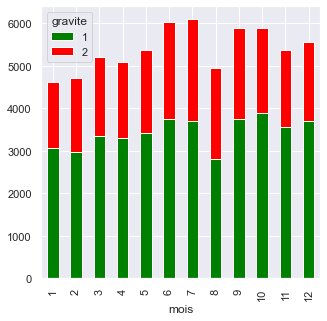

In [12]:
#Création des bases de données qui seront utilisées
df_accidents = df_accidents.assign(accident=1)
df_date = df_accidents.groupby('date').agg({"accident" : 'sum'}).reset_index()
df_date_grav1 = df_accidents[df_accidents.gravite==1].groupby('date').agg({"accident" : 'sum'}).reset_index()
df_date_grav2 = df_accidents[df_accidents.gravite==2].groupby('date').agg({"accident" : 'sum'}).reset_index()

#Tracé diagramme en barres impact du mois
diag_barres_gravite_cumulees_effectif(df_accidents, "mois")

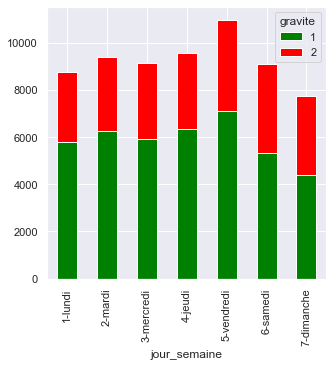

In [13]:
#Tracé diagramme en barres impact de la journée
diag_barres_gravite_cumulees_effectif(df_accidents, "jour_semaine")

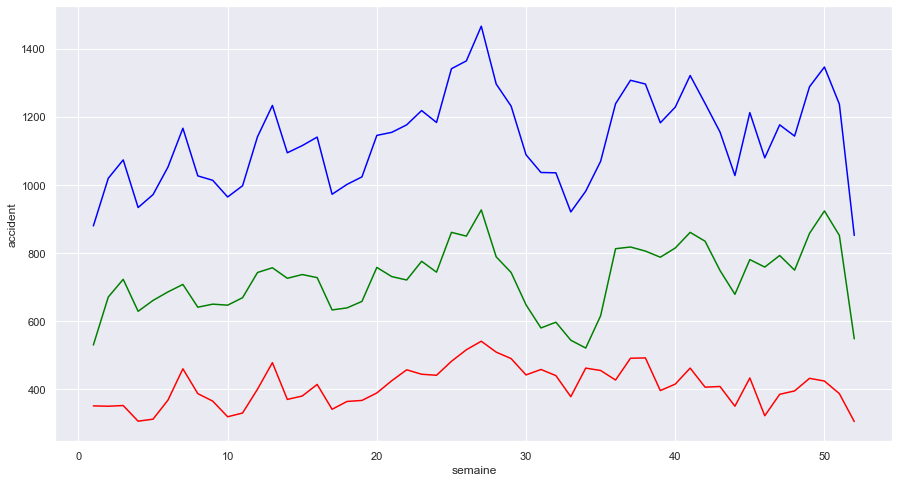

In [28]:
#Etude l'impact des saisons/du moment dans l'année
df_accidents = df_accidents.assign(semaine=0)
for i in range (df_accidents.shape[0]) :
    df_accidents["semaine"][i] = (df_accidents["date"][i]).isocalendar()[1]
    
df_semaine = df_accidents.groupby('semaine').agg({"accident" : 'sum'}).reset_index()
df_semaine_grav1 = df_accidents[df_accidents.gravite==1].groupby('semaine').agg({"accident" : 'sum'}).reset_index()
df_semaine_grav2 = df_accidents[df_accidents.gravite==2].groupby('semaine').agg({"accident" : 'sum'}).reset_index()

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='semaine', y = 'accident', data = df_semaine, color = 'blue')
sns.lineplot(x='semaine', y = 'accident', data = df_semaine_grav1, color = 'green')
sns.lineplot(x='semaine', y = 'accident', data = df_semaine_grav2, color = 'red')

A l'aide des graphiques, on remarque qu'il y a plus d'accidents aux mois de juin et juillet et étonamment moins d'accidents en août, ainsi qu'en janvier et février. Toutefois, au mois d'août, les accidents sont moins nombreux, mais il y a une plus grande proportion d'accidents graves.  
On constate qu'il y a plus d'accidents le vendredi et que les accidents ayant lieu le week-ends semblent être moins graves.
Le dernier graphique nous montre que la gravité des accidents ne semble pas dépendre du moment de l'année. Nous ne constatons pas d'effet saisonnier.

### 2. Impact du moment de la journée

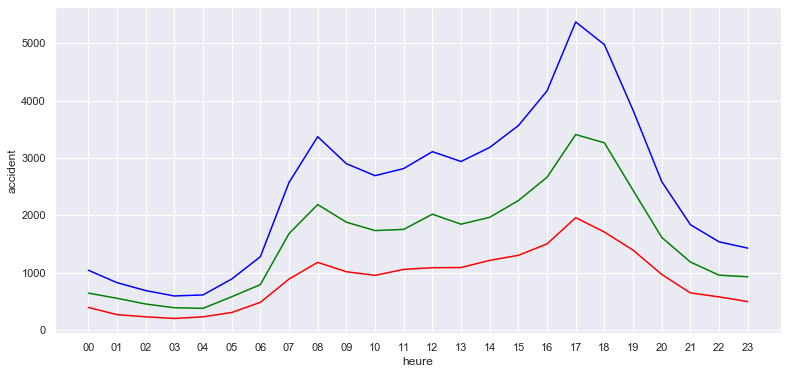

In [19]:
# On récupère l'heure de l'accident
df_accidents['heure'] = df.hrmn.str[:2]

# Calcul du nombre total d'accidents selon l'heure
df_heure = df_accidents.groupby('heure').agg({"accident" : 'sum'}).reset_index()
df_heure_grav1 = df_accidents[df_accidents.gravite==1].groupby('heure').agg({"accident" : 'sum'}).reset_index()
df_heure_grav2 = df_accidents[df_accidents.gravite==2].groupby('heure').agg({"accident" : 'sum'}).reset_index()

# Tracer l'évolution du nombre d'accidents selon le moment de la journée
sns.set(rc = {'figure.figsize':(13,6)})
sns.lineplot(x='heure', y = 'accident', data = df_heure, color = 'blue')
sns.lineplot(x='heure', y = 'accident', data = df_heure_grav1, color = 'green')
sns.lineplot(x='heure', y = 'accident', data = df_heure_grav2, color = 'red')

Les accidents sont plus nombreux le matin, entre 7 et 9 heures. Le deuxième pic apparaît entre 16 et 19 heures.

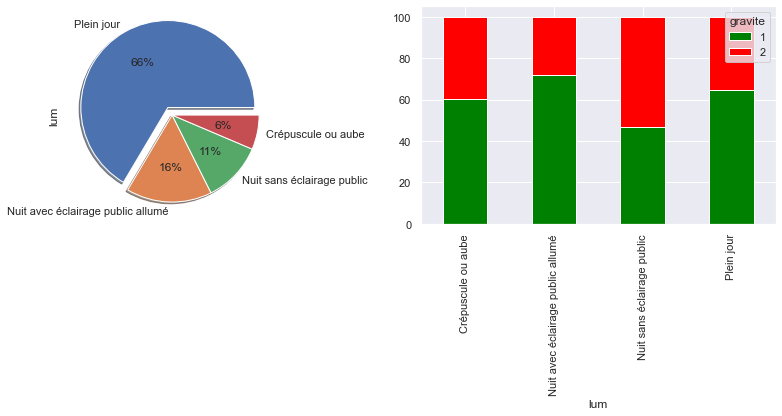

In [15]:
#Etude des conditions de luminosité
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.lum.value_counts().plot.pie(autopct='%1.0f%%', explode=(0.1,0,0,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents, "lum")

La plupart des accident ont lieu en plein jour (car il y a plus de circulation la journée). \
Nous remarquons que les accidents ayant lieu la nuit sans éclairage public sont plus graves que ceux ayant lieu avec éclairage public ou de jour. 

### 3. Impact des conditions météorologiques

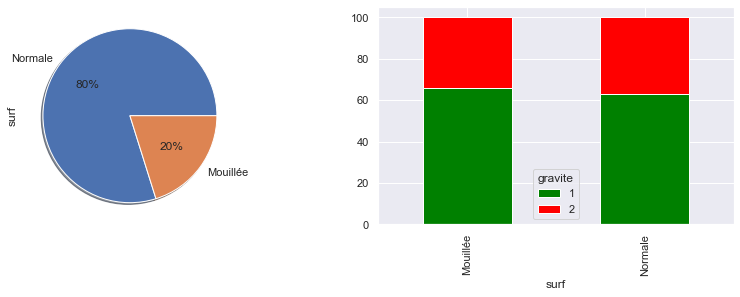

In [16]:
#Etude de l'état de la surface de la route
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents["surf"].value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents, "surf")

L'état de la surface de la route ne semble pas influencer la gravité de l'accident. En effet, sur route mouillée, 34% des accidents sont graves et sur route normale, 37% des accidents le sont. Ce sont des proportions proches.

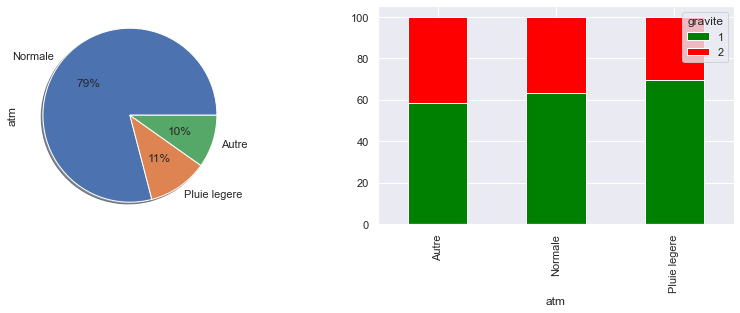

In [17]:
#Etude des conditions atmosphériques
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents["atm"].value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents, "atm")

Lorsqu'il pleut, l'accident est moins grave qu'en situation normale. Ce résultat contre-intuitif peut-être expliqué de deux façons :
* lorsqu'il pleut, les usagers font plus attention, roulent moins vite, ce qui provoque des accidents moins graves
* l'effectif des accidents ayant lieu avec une pluie légère est trop faible pour conclure  

On trouve des accidents plus graves lorsqu'ils ont lieu en présence de brouillard, neige, verglas (catégorie Autre).

## <center> USAGERS

Etudions désormais l'impact des caractéristiques des usagers impliqués dans l'accident sur la gravité de celui-ci. Ces caractéristiques seront étudiées à travers:
* le sexe de l'usager
* la catégorie de l'usager (conducteur/passager/piéton)

### 1. Sexe de l'usager

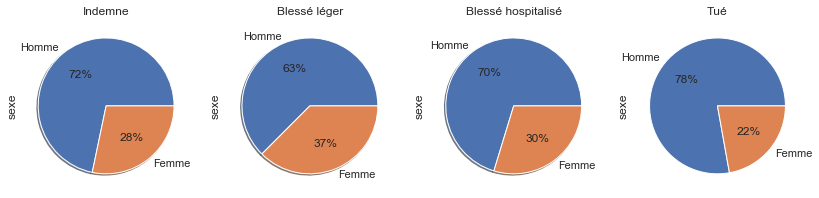

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14,4))
df_usagers[df_usagers.grav=="Indemne"]["sexe"].value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[0], title = "Indemne")
df_usagers[df_usagers.grav=="Blesse leger"]["sexe"].value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[1], title = "Blessé léger")
df_usagers[df_usagers.grav=="Blesse hospitalise"]["sexe"].value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[2], title = "Blessé hospitalisé")
df_usagers[df_usagers.grav=="Tue"].sexe.value_counts().plot.pie(autopct='%1.0f%%', ax=ax[3], title = "Tué")

Parmi les accidents de la route de 2019, on compte 32% de femmes. Ces dernières sont sur-représentées parmi les blessés légers et sous-représentées parmi les indemnes.

### 2. Catégorie de l'usager

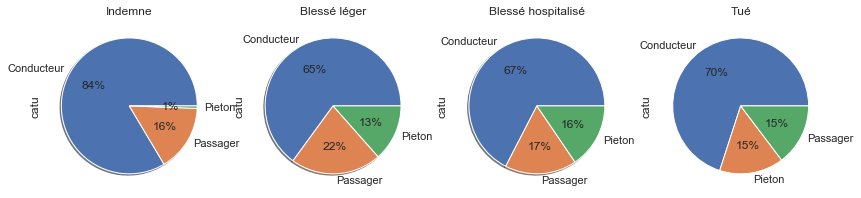

In [76]:
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(14,4))
df_usagers[df_usagers.grav=="Indemne"]["catu"].value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[0], title = "Indemne")
df_usagers[df_usagers.grav=="Blesse leger"]["catu"].value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[1], title = "Blessé léger")
df_usagers[df_usagers.grav=="Blesse hospitalise"]["catu"].value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[2], title = "Blessé hospitalisé")
df_usagers[df_usagers.grav=="Tue"].catu.value_counts().plot.pie(autopct='%1.0f%%', ax=ax[3], title = "Tué")

Parmi les usagers, il y a :
* 73% de conducteurs
* 18% de passagers
* 8% de piétons

On trouve une sur-représentation des piétons parmi les personnes tuées et hospitalisées. Ces piétons sont sous-représentés parmi les indemnes. Les passagers sont quant à eux sur-représentés parmi les blessés légers. Enfin, les conducteurs sont sur-représentés parmi les indemnes. \
Ces résultats sont cohérents, les piétons ne sont pas protégés et sont donc les plus vulnérables lors d'un accident de la route. \
Par ailleurs, les conducteurs sont protégés par le volant et ne sont pas impactés par les refus de priorité à droite. Cela pourrait expliquer leur sur-représentation parmi les personnes indemnes. \
Enfin, il serait intéressant de voir le lien entre le sexe et la place du passager. En effet, les conducteurs sont souvent des hommes avec une carure plus solide contrairement aux femmes, souvent passagères, qui sont plus légères et risques d'être blessées lors des accidents.

## <center> STYLE DE CONDUITE

Nous allons étudier l'impact du style de conduite sur le nombre et la gravité des accidents. Le style de conduite est notammenté évalué à travers les variables:
1. motif du trajet (trajet professionnel, de loisirs, autre...)
2. catégorie du véhicule utilisé

### 1. Motif du trajet

Pour étudier la variable trajet, on s'intéresse au motif du trajet par véhicule impliqué dans l'accident. Nous décidons de prendre le motif uniquement du conducteur. On s'intéresse d'abord au pourcentage de véhicules dont le motif de déplacement n'a pas été renseigné (NaN).

In [27]:
pourcentage_NaN = (df_usagers[df_usagers['catu'].isin(['Conducteur'])].trajet.isna().sum())/len(df_usagers[df_usagers['catu'].isin(['Conducteur'])])*100
print ("Le pourcentage de véhicules accidentés au motif de déplacement inconnu est de " + str(int(pourcentage_NaN)) +"%.")

Le pourcentage de véhicules accidentés au motif de déplacement inconnu est de 33%.


Parmi les 66% de véhicules accidentés restant, on s'intéresse au motif de déplacement des conducteurs.

Text(0.5, 1.0, 'Pourcentage des motifs de déplacement')

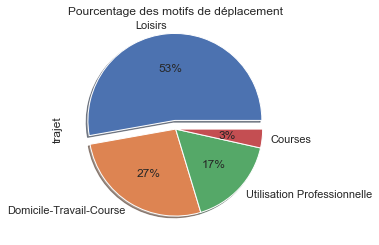

In [31]:
df_usagers[df_usagers['catu'].isin(['Conducteur'])].trajet.value_counts().plot.pie(autopct='%1.0f%%',explode=(0.1,0,0,0),shadow=True)
plt.title('Pourcentage des motifs de déplacement')

Parmi les accidents dont le motif de déplacement est renseigné, plus de la moitié (53%) a lieu lors d'un déplacement de loisirs.

### 2. Catégorie de véhicule

Pour étudier cette variable, on utilise la base de données avec une ligne par véhicule (df_vehicules), à laquelle on ajoute la variable gravite

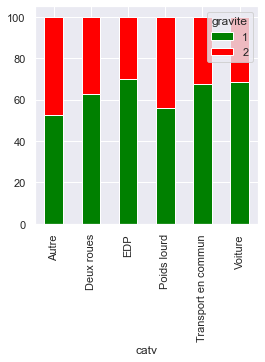

In [21]:
#Ajout de la variable gravite à la base de données véhicules
df_vehicules_gravite = df_vehicules.merge(df[['Num_Acc','gravite']],how='inner',on='Num_Acc')
df_vehicules_gravite.drop_duplicates(keep = 'first', inplace=True)
#Diagramme à barres empilées de la gravité de l'accident par rapport à la catégorie de véhicule
diag_barres_gravite_cumulees(df_vehicules_gravite,'catv')

In [33]:
#Calculs des pourcentages d'accidents de gravité de type 2 pour chaque catégorie de véhicule
print('Autre:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Autre'])].gravite.mean()-1)*100))+'%')
print('Deux roues:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Deux roues'])].gravite.mean()-1)*100))+'%')
print('EDP:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['EDP'])].gravite.mean()-1)*100))+'%')
print('Poids lourd:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Poids lourd'])].gravite.mean()-1)*100))+'%')
print('Transport en commun:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Transport en commun'])].gravite.mean()-1)*100))+'%')
print('Voiture:'+str(round((df_vehicules_gravite[df_vehicules_gravite['catv'].isin(['Voiture'])].gravite.mean()-1)*100))+'%')

Autre:47%
Deux roues:37%
EDP:30%
Poids lourd:44%
Transport en commun:32%
Voiture:32%


On remarque que les poids lourds et les véhicules classés dans "Autre" (tracteurs agricoles, side-cars, quads...) sont particulièrement concernés par les accidents de gravité de type 2 (respectivement 44% et 47%). Pour les autres véhicules, les accidents de type 2 représentent environ 32% des accidents. Nous n'observons donc pas particulièrement de corrélation liée à la catégorie du véhicule.

## <center> ROUTE

Nous allons désormais étudier l'impact des caractéristiques de la route empruntée sur le nombre et la gravité de l'accident. Parmi les caractéristiques de la route, nous allons en particulier nous intéresser à:
1. la catégorie de la route (route nationale, autoroute...)
2. le régime de circulation
3. le nombre total de voies de circulation
4. la déclivité de la route à l'endroit de l'accident
5. le tracé général de la route
6. la limitation de vitesse
7. la présence ou non d'obstacle (mobile ou fixe)  

Toutes ces variables seront étudiées par accident et donc avec la base de données df_accidents

### 1. Catégorie de route

In [9]:
print('NaN:' + str(round(df_accidents['catr'].isna().sum()/len(df_accidents['catr'])*100)) +'%')

NaN:0%


Ok variable bien renseignée

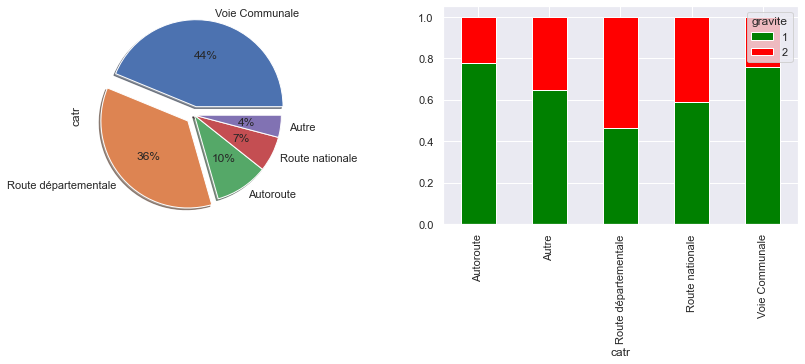

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.catr.value_counts().plot.pie(autopct='%1.0f%%',explode=(0.1,0.1,0,0,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'catr')

In [13]:
#Calculs des pourcentages d'accidents de gravité de type 2 pour chaque catégorie de route
print('Autoroute:'+str(round((df_accidents[df_accidents['catr'].isin(['Autoroute'])].gravite.mean()-1)*100))+'%')
print('Autre:'+str(round((df_accidents[df_accidents['catr'].isin(['Autre'])].gravite.mean()-1)*100))+'%')
print('Route départementale:'+str(round((df_accidents[df_accidents['catr'].isin(['Route départementale'])].gravite.mean()-1)*100))+'%')
print('Route nationale:'+str(round((df_accidents[df_accidents['catr'].isin(['Route nationale'])].gravite.mean()-1)*100))+'%')
print('Voie Communale:'+str(round((df_accidents[df_accidents['catr'].isin(['Voie Communale'])].gravite.mean()-1)*100))+'%')

Autoroute:22%
Autre:36%
Route départementale:54%
Route nationale:41%
Voie Communale:24%


On remarque que la grande majorité des accidents a lieu sur une voie communale (44%) ou sur une route départementale (36%). Mais les accidents sont plus graves sur une route départementale (54% de gravité de type 2) que sur une voie communale (24% de gravité de type 2). On remarque également que les accidents sont plus graves sur une route nationale (41% d'accidents de gravité type 2) que sur une autoroute (22% d'accidents de gravité de type 2).

### 2. Régime de circulation

In [14]:
print('NaN:' + str(round(df_accidents['circ'].isna().sum()/len(df_accidents['circ'])*100)) +'%')

NaN:5%


Ok variable bien renseignée

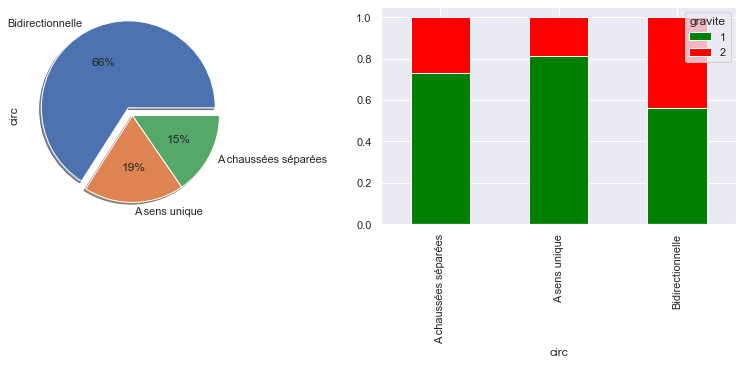

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.circ.value_counts().plot.pie(autopct='%1.0f%%', explode=(0.1,0,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'circ')

In [16]:
#Calculs des pourcentages d'accidents de gravité de type 2 pour chaque régime de circulation
print('Bidirectionnelle:'+str(round((df_accidents[df_accidents['circ'].isin(['Bidirectionnelle'])].gravite.mean()-1)*100))+'%')
print('A sens unique:'+str(round((df_accidents[df_accidents['circ'].isin(['A sens unique'])].gravite.mean()-1)*100))+'%')
print('A chaussées séparées:'+str(round((df_accidents[df_accidents['circ'].isin(['A chaussées séparées'])].gravite.mean()-1)*100))+'%')

Bidirectionnelle:44%
A sens unique:19%
A chaussées séparées:27%


On remarque qu'une grande majorité (66%) des accidents a lieu sur des voies bidirectionnelles et que ces accidents sont plus graves (44% de gravité de type 2) que si ils ont lieu sur des routes à voie unique ou à chaussées séparées.

### 3. Nombre total de voies de circulation

In [17]:
print('NaN:' + str(round(df_accidents['nbv'].isin([-1]).sum()/len(df_accidents['nbv'])*100)) +'%')

NaN:1%


Ok variable bien renseignée

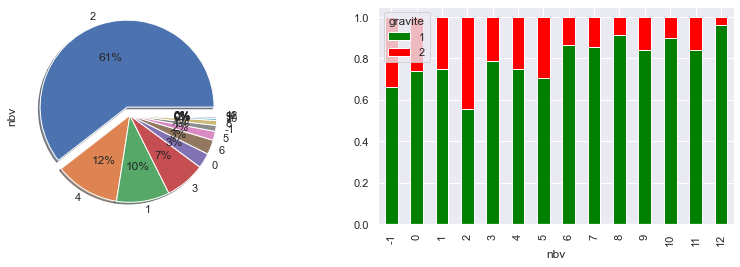

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.nbv.value_counts().plot.pie(autopct='%1.0f%%', explode= (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'nbv')

In [19]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour une route avec 2 voies de circulation
print('2 voies:'+str(round((df_accidents[df_accidents['nbv'].isin([2])].gravite.mean()-1)*100))+'%')

2 voies:44%


On remarque qu'une grande majorité (62%) des accidents a lieu sur des routes à 2 voies et que ces accidents sont plus graves (44% des accidents sont de gravité de type 2) que les accidents qui ont lieu sur des routes avec plus ou moins de voies.  
Ce résultat peut s'expliquer par le fait que la majorité des routes sont à 2 voies.

### 4. Déclivité de la route à l'endroit de l'accident

In [20]:
print('NaN:' + str(round(df_accidents['prof'].isna().sum()/len(df_accidents['prof'])*100)) +'%')

NaN:0%


Ok variable bien renseignée

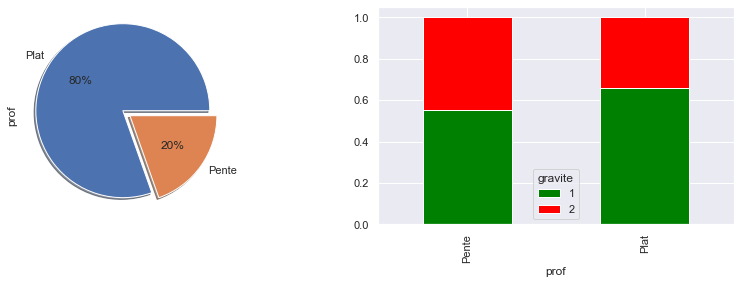

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.prof.value_counts().plot.pie(autopct='%1.0f%%', explode = (0.1,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'prof')

In [23]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour chaque type de déclivité
print('Plat:'+str(round((df_accidents[df_accidents['prof'].isin(['Plat'])].gravite.mean()-1)*100))+'%')
print('Pente:'+str(round((df_accidents[df_accidents['prof'].isin(['Pente'])].gravite.mean()-1)*100))+'%')

Plat:34%
Pente:45%


On remarque qu'une grande majorité (80%) d'accidents ont lieu sur des routes plates, mais que les accidents ayant lieu en pente sont plus graves (45% de gravité de type 2) contre 34% pour les accidents ayant lieu sur terrain plat.

### 5. Tracé général de la route

In [24]:
print('NaN:' + str(round(df_accidents['plan'].isna().sum()/len(df_accidents['plan'])*100)) +'%')

NaN:0%


Ok variable bien renseignée

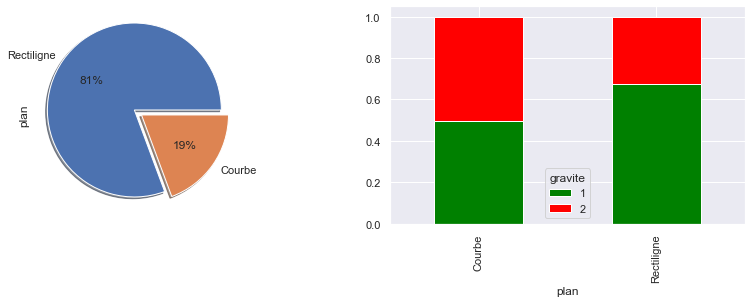

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.plan.value_counts().plot.pie(autopct='%1.0f%%', explode =(0.1,0), shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'plan')

In [26]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour chaque type de tracé
print('Rectiligne:'+str(round((df_accidents[df_accidents['plan'].isin(['Rectiligne'])].gravite.mean()-1)*100))+'%')
print('Courbe:'+str(round((df_accidents[df_accidents['plan'].isin(['Courbe'])].gravite.mean()-1)*100))+'%')

Rectiligne:33%
Courbe:50%


On remarque qu'une grande majorité (81%) d'accidents ont lieu sur des routes rectilignes, mais que les accidents ayant lieu sur des routes avec un tracé en courbe sont plus graves (50% de gravité de type 2) contre 33% pour les accidents ayant lieu sur des routes rectilignes.

### 6. Limitation de vitesse

In [27]:
print('NaN:' + str(round(df_accidents['vma'].isin([-1]).sum()/len(df_accidents['vma'])*100)) +'%')

NaN:1%


Ok variable bien renseignée

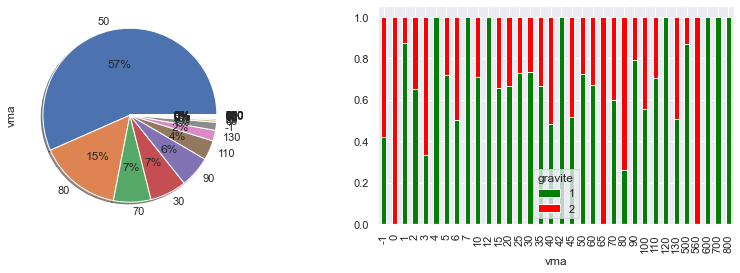

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.vma.value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'vma')

Intéressons nous en particulier aux limitations de vitesse entre 30 et 140 km/h.

<AxesSubplot:xlabel='vma'>

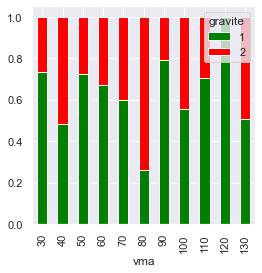

In [34]:
df_vma = df_accidents[df_accidents['vma'].isin([30, 40, 50,60, 70,80,90, 100, 110, 120, 130])]
data = pd.crosstab(df_vma['vma'], df.gravite, normalize = "index").reset_index().set_index('vma')
data.plot(kind = "bar", stacked=True, color = ["green", "red"])

In [35]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour chaque limitation de vitesse
print('30 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([30])].gravite.mean()-1)*100))+'%')
print('40 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([40])].gravite.mean()-1)*100))+'%')
print('50 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([50])].gravite.mean()-1)*100))+'%')
print('60 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([60])].gravite.mean()-1)*100))+'%')
print('70 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([70])].gravite.mean()-1)*100))+'%')
print('80 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([80])].gravite.mean()-1)*100))+'%')
print('90 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([90])].gravite.mean()-1)*100))+'%')
print('100 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([100])].gravite.mean()-1)*100))+'%')
print('110 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([110])].gravite.mean()-1)*100))+'%')
print('120 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([120])].gravite.mean()-1)*100))+'%')
print('130 km/h:'+str(round((df_accidents[df_accidents['vma'].isin([130])].gravite.mean()-1)*100))+'%')

30 km/h:27%
40 km/h:52%
50 km/h:27%
60 km/h:33%
70 km/h:40%
80 km/h:74%
90 km/h:21%
100 km/h:44%
110 km/h:29%
120 km/h:0%
130 km/h:49%


On remarque qu'une grande majorité (57%) des accidents observés ont lieu sur des routes limitées à 50 km/h. Comme on peut s'y attendre, la gravité de l'accident augmente lorsque la limitation de vitesse augmente entre 30 et 80 km/h. Les accidents ayant lieu sur une route limitée à 80 km/h sont particulièrement graves: 74% sont de gravité de type 2. Mais étrangement, les accidents avec une limitation de vitesse strictement supérieures à 90 km/h sont moins graves. Ceci peut s'expliquer par le fait que moins d'accidents y sont observés et, comme vu précédemment, les accidents sur autoroute et route nationale sont moins graves. Notons que les accidents sur des routes limitées à 130 km/h sont de gravité de type 2 à 49%, dangerosité liée à la vitesse.

### 7. Présence ou non d'obstacle

In [36]:
#Ajout de la variable obstacle à la base de données df_accidents
df_obstacle = df_accidents.merge(df[['Num_Acc','obstacle']], how='inner', on=['Num_Acc'])
df_obstacle.drop_duplicates(keep = 'first', inplace=True)

In [37]:
print('NaN:' + str(round(df_obstacle['obstacle'].isin(['NaN']).sum()/len(df_obstacle['obstacle'])*100)) +'%')

NaN:0%


Ok variable bien renseignée

<AxesSubplot:xlabel='obstacle'>

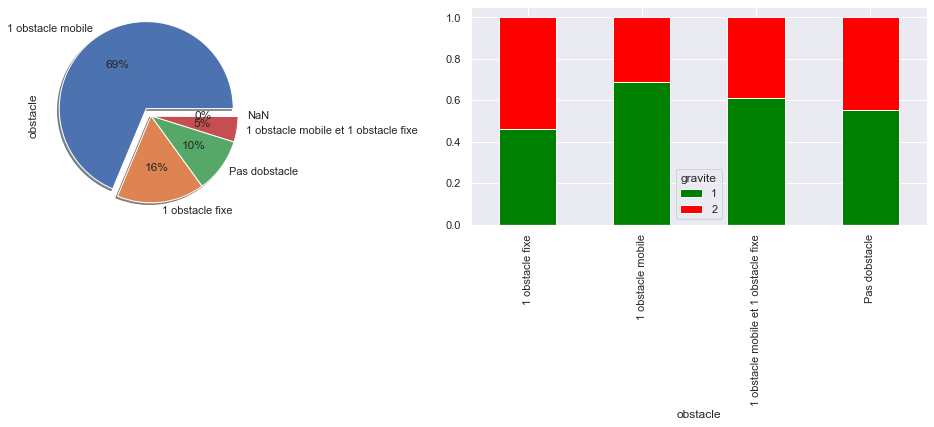

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
df_obstacle.obstacle.value_counts().plot.pie(autopct='%1.0f%%', shadow=True, explode=(0.1,0,0,0,0), ax=ax[0])
data_obstacle = df_obstacle[df_obstacle['obstacle'].isin(['1 obstacle fixe','1 obstacle mobile','1 obstacle mobile et 1 obstacle fixe', 'Pas dobstacle'])]
data = pd.crosstab(data_obstacle['obstacle'], df.gravite, normalize = "index").reset_index().set_index('obstacle')
data.plot(kind = "bar", stacked=True, color = ["green", "red"], ax=ax[1])

In [40]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour chaque type d'obstacle
print('1 obstacle fixe: '+str(round((df_obstacle[df_obstacle['obstacle'].isin(['1 obstacle fixe'])].gravite.mean()-1)*100))+'%')
print('1 obstacle mobile: '+str(round((df_obstacle[df_obstacle['obstacle'].isin(['1 obstacle mobile'])].gravite.mean()-1)*100))+'%')
print('1 obstacle mobile et 1 obstacle fixe: '+str(round((df_obstacle[df_obstacle['obstacle'].isin(['1 obstacle mobile et 1 obstacle fixe'])].gravite.mean()-1)*100))+'%')
print('Pas dobstacle: '+str(round((df_obstacle[df_obstacle['obstacle'].isin(['Pas dobstacle'])].gravite.mean()-1)*100))+'%')

1 obstacle fixe: 54%
1 obstacle mobile: 31%
1 obstacle mobile et 1 obstacle fixe: 39%
Pas dobstacle: 44%


On remarque que la plupart des accidents ont rencontré un obstacle, dont une très grande majorité (69%) un obstacle mobile. Cependant, rencontrer ou non un obstacle n'est pas déterminant de la gravité de l'accident: 31% des accidents avec un obstacle mobile sont de gravité de type 2 tandis que 44% des accidents sans obstacle sont de gravité de type 2. La gravité de l'accident ne semble donc pas corrélée avec la présence ou non d'un obstacle.

En résumé, les principales conclusions de cette partie sont:
- les accidents sont plus nombreux sur les routes départementales et les voies communales, et plus graves sur les routes départementales
- les accidents sont plus nombreux et plus graves sur les routes bidirectionnelles
- les accidents sont plus nombreux et plus graves sur les routes à 2 voies
- les accidents sont plus nombreux sur les routes plates mais ils sont plus graves sur les routes en pente
- les accidents sont plus nombreux sur les routes rectilignes mais ils sont plus graves sur les routes en courbe
- les accidents sont plus nombreux sur les routes limitées à 50 km/h, mais ils sont plus graves sur les routes limitées à 80 km/h
- la majorité des accidents ont rencontré 1 obstacle mobile mais la variable obstacle ne semble pas être corrélée à la gravité de l'accident

## <center> ACCIDENTS

Etudions désormais les caractéristiques propres à l'accident, à travers:
1. l'endroit du choc sur le véhicule
2. le nombre d'usagers impliqués dans l'accident

### 1. Endroit du choc sur le véhicule

On étudie cette variable par véhicule, avec la base de données df_vehicules_gravite créée précédemment

In [23]:
print('NaN:' + str(round(df_vehicules_gravite['choc'].isna().sum()/len(df_vehicules_gravite['choc'])*100)) +'%')

NaN:0%


Ok variable bien renseignée

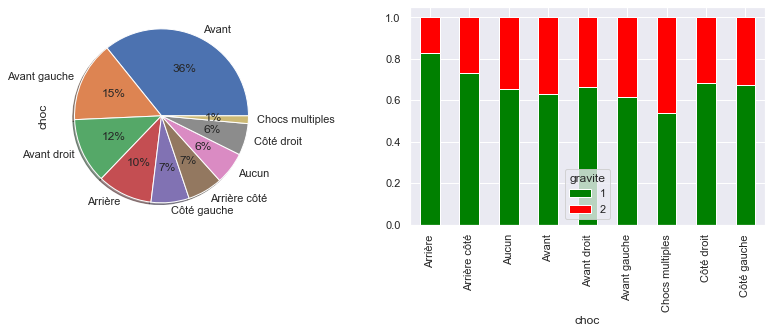

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_vehicules_gravite.choc.value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_vehicules_gravite,'choc')

In [24]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour chaque localisation de choc
print('Arrière: '+str(round((df_vehicules_gravite[df_vehicules_gravite['choc'].isin(['Arrière'])].gravite.mean()-1)*100))+'%')
print('Arrière côté: '+str(round((df_vehicules_gravite[df_vehicules_gravite['choc'].isin(['Arrière côté'])].gravite.mean()-1)*100))+'%')
print('Aucun: '+str(round((df_vehicules_gravite[df_vehicules_gravite['choc'].isin(['Aucun'])].gravite.mean()-1)*100))+'%')
print('Avant: '+str(round((df_vehicules_gravite[df_vehicules_gravite['choc'].isin(['Avant'])].gravite.mean()-1)*100))+'%')
print('Avant droit: '+str(round((df_vehicules_gravite[df_vehicules_gravite['choc'].isin(['Avant droit'])].gravite.mean()-1)*100))+'%')
print('Avant gauche: '+str(round((df_vehicules_gravite[df_vehicules_gravite['choc'].isin(['Avant gauche'])].gravite.mean()-1)*100))+'%')
print('Chocs multiples: '+str(round((df_vehicules_gravite[df_vehicules_gravite['choc'].isin(['Chocs multiples'])].gravite.mean()-1)*100))+'%')
print('Côté droit: '+str(round((df_vehicules_gravite[df_vehicules_gravite['choc'].isin(['Côté gauche'])].gravite.mean()-1)*100))+'%')

Arrière: 17%
Arrière côté: 27%
Aucun: 34%
Avant: 37%
Avant droit: 34%
Avant gauche: 38%
Chocs multiples: 46%
Côté droit: 33%


Nous constatons qu'une grande majorité des chocs a lieu à l'avant des véhicules (36% à l'avant, 15% à l'avant gauche et 12% à l'avant droit), mais que les accidents avec chocs à l'avant ne sont pas plus graves que des accidents avec chocs sur les côtés. On remarque néanmoins que les accidents avec des chocs à l'arrière sont moins graves (17% de gravité de type 2) et que les accidents avec chocs multiples sont plus graves (46% de gravité de type 2), ce qui est cohérent.

### 2. Nombre d'usagers dans le véhicule

On étudie cette variable par accident, et donc avec la base de données df_accidents

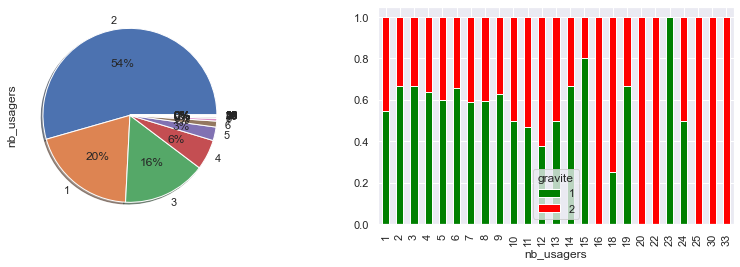

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
df_accidents.nb_usagers.value_counts().plot.pie(autopct='%1.0f%%', shadow=True, ax=ax[0])
diag_barres_gravite_cumulees_axis1(df_accidents,'nb_usagers')

Intéressons nous en particulier aux accidents impliquant 1,2,3 et 4 usagers (>5%)

In [13]:
#Calculs du pourcentage d'accidents de gravité de type 2 pour les accidents impliquant 1,2,3 et 4 usagers
print('1 usager: '+str(round((df_accidents[df_accidents['nb_usagers'].isin([1])].gravite.mean()-1)*100))+'%')
print('2 usagers: '+str(round((df_accidents[df_accidents['nb_usagers'].isin([2])].gravite.mean()-1)*100))+'%')
print('3 usagers: '+str(round((df_accidents[df_accidents['nb_usagers'].isin([3])].gravite.mean()-1)*100))+'%')
print('4 usagers: '+str(round((df_accidents[df_accidents['nb_usagers'].isin([4])].gravite.mean()-1)*100))+'%')

1 usager: 45%
2 usagers: 33%
3 usagers: 33%
4 usagers: 36%


On remarque que la majorité (54%) des accidents implique uniquement 2 usagers. Notons que même 20% des accidents impliquent uniquement 1 usager. Ces accidents sont même étonnament plus graves (45% de gravité de type 2) que ceux impliquant 2 à 8 usagers.  
Comme on peut s'y attendre, les accident impliquant plus de 8 usagers sont en général plus graves.

# Conclusion

Cette partie Statistiques Descriptives a mis en valeur plusieurs facteurs pouvant influencer le nombre et la gravité des accidents. Parmi les différents facteurs développés, nous pouvons notamment retenir que:
* il existe 2 pics du nombre d'accidents au cours de la journée: un premier pic entre 7 heures et  9 heures et un second pic entre 17 heures et 19 heures
* les hommes sont largement plus impliqués dans les accidents, mais ils s'en sortent plus souvent indemnes que les femmes
* les accidents ont davantage lieu lors de déplacements de loisirs
* les accidents sont plus nombreux sur les routes départementales et les voies communales, et plus graves sur les routes départementales
* la majorité des accidents implique uniquement 2 usagers